# Import Libraries and Data

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import featureSelection as fs

In [59]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [60]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [61]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [62]:
#construct dataframe:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], 'target'))
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [63]:
 maximums = [df[feature].max() for feature in df.columns]
 miminums = [df[feature].min() for feature in df.columns]
 means = [df[feature].mean() for feature in df.columns]
     


In [64]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [65]:
X = df.drop(['target'], axis =1)
y = df['target']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Data Analysis

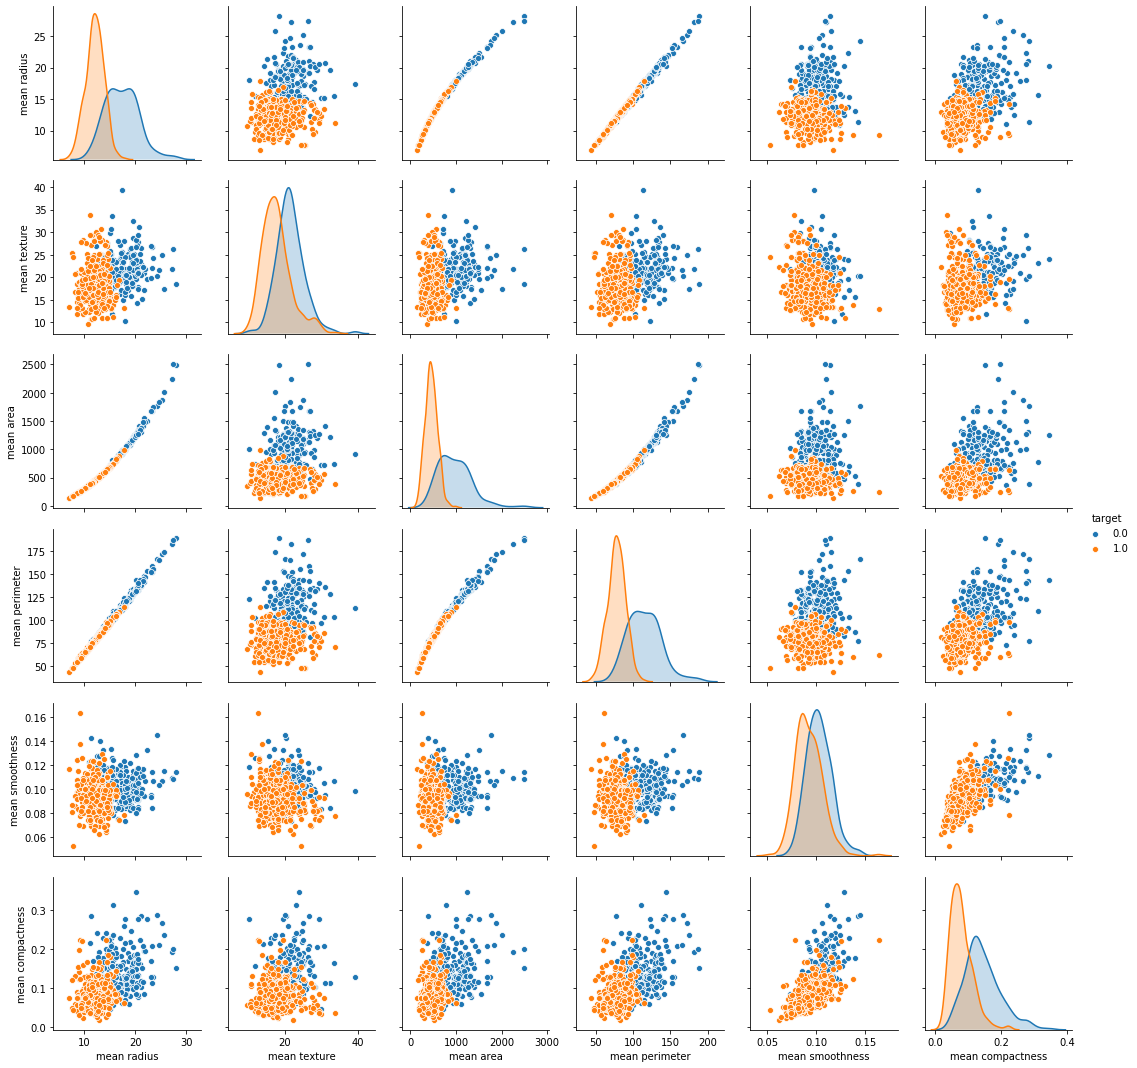

In [67]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness', 'mean compactness'])

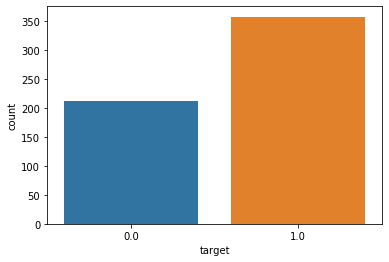

In [68]:
sns.countplot(df['target'], label='Count')

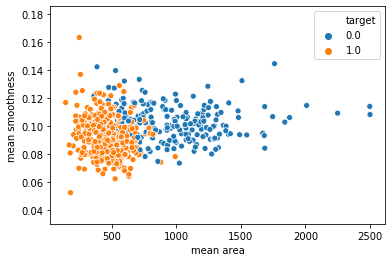

In [69]:
# separation of data (mean area vs mean smoothness)
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue='target', data = df)

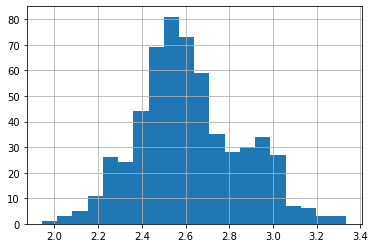

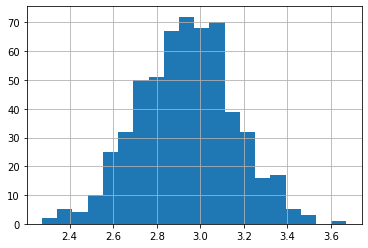

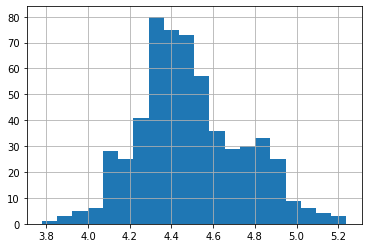

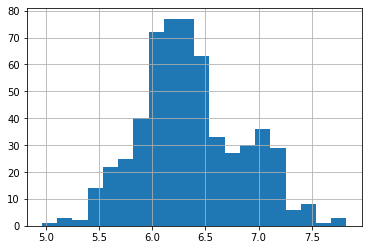

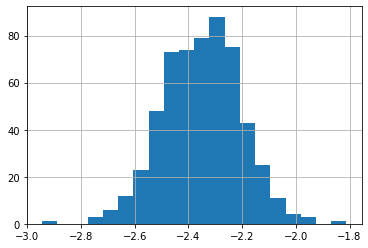

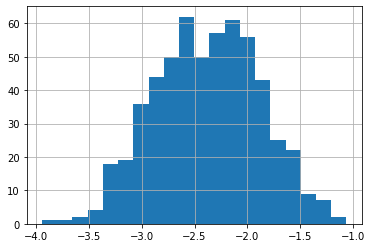

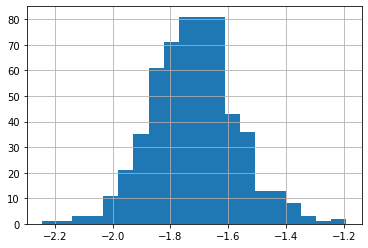

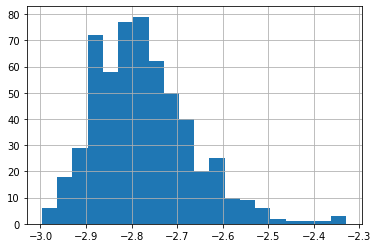

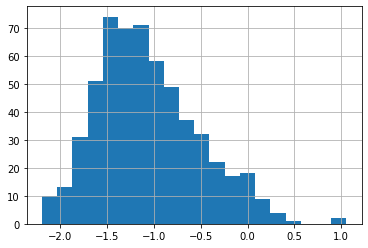

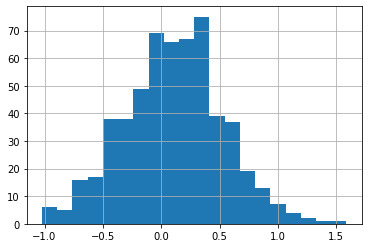

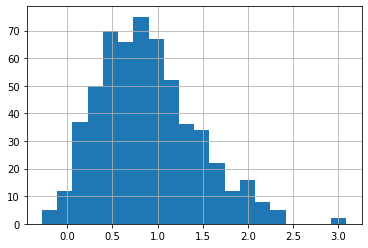

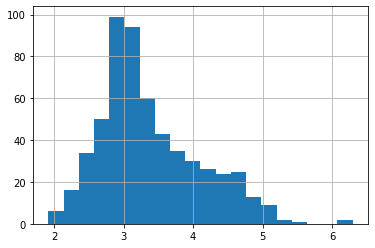

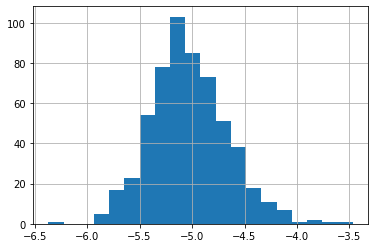

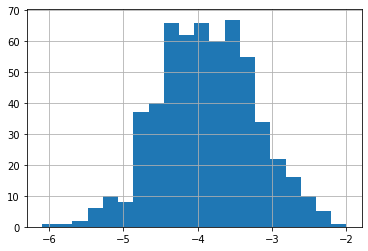

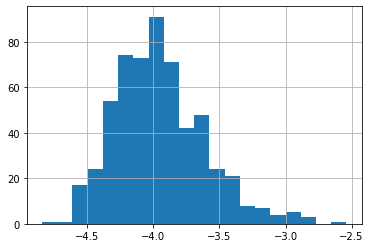

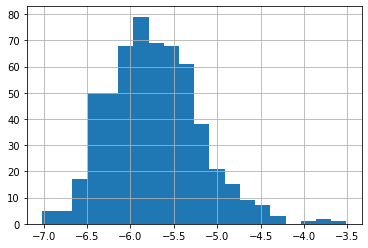

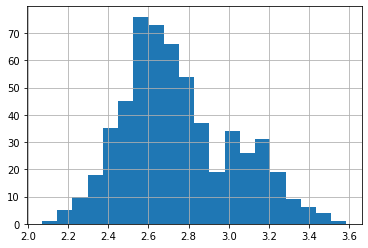

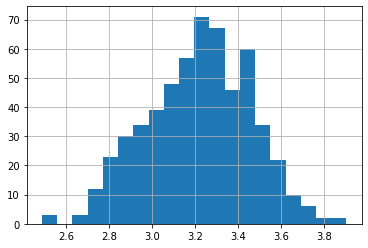

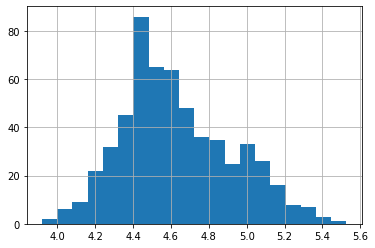

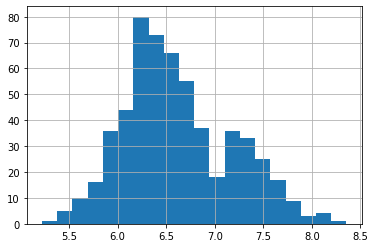

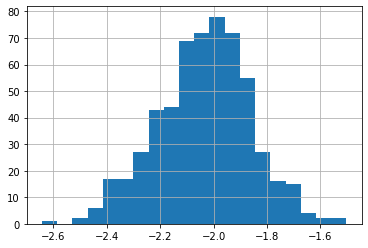

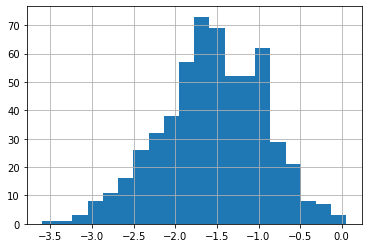

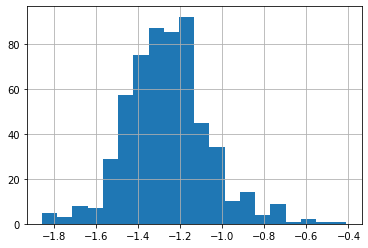

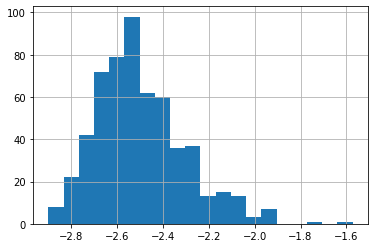

In [70]:
def analyse_features(df, var):
    df = df.copy()
    if 0 in df[var].unique():
        pass
    else:
        np.log(df[var]).hist(bins=20)
        plt.show()

for var in df.columns:
    analyse_features(df,var)

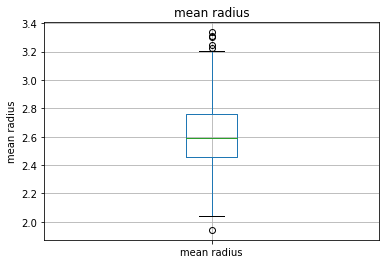

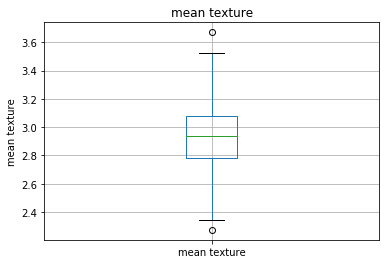

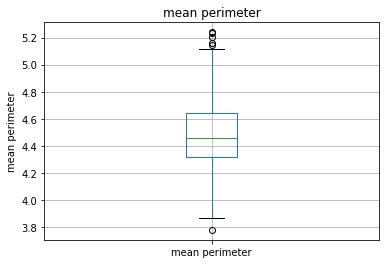

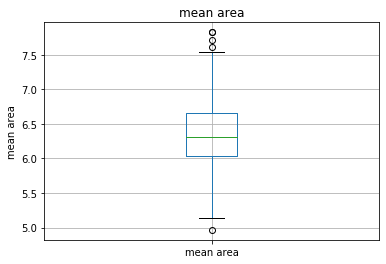

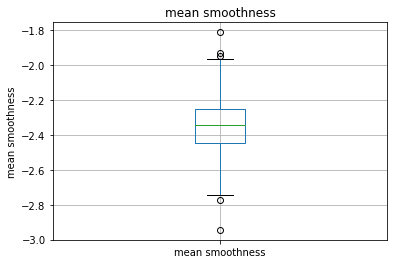

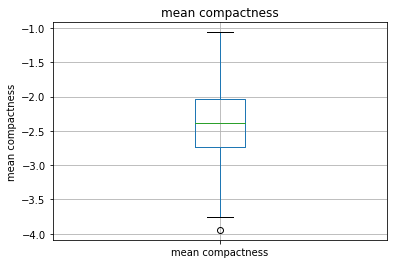

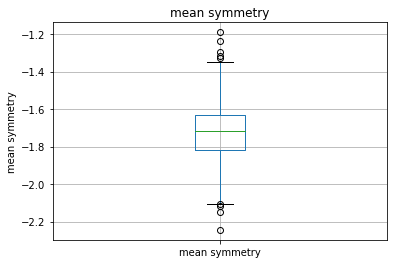

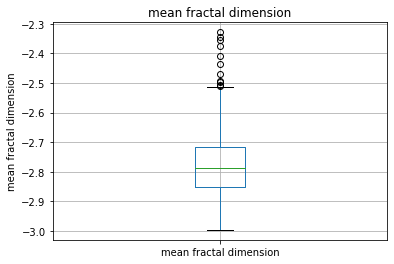

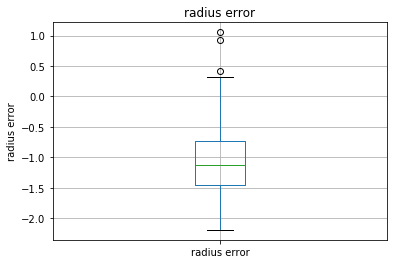

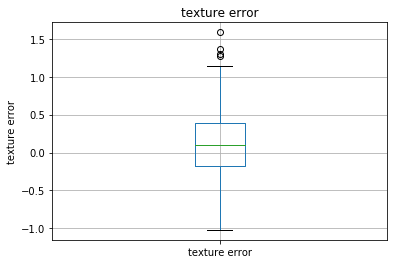

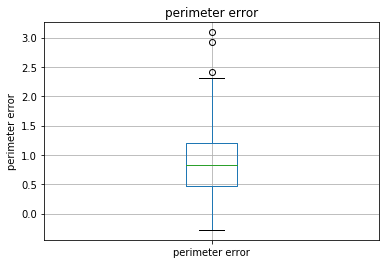

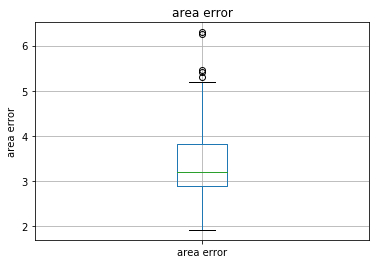

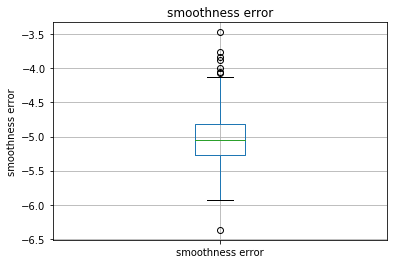

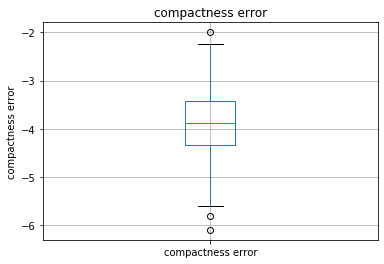

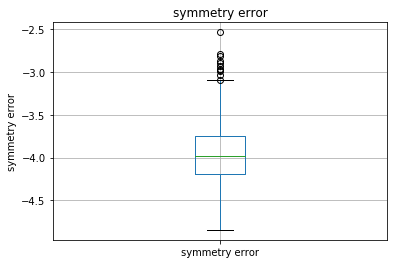

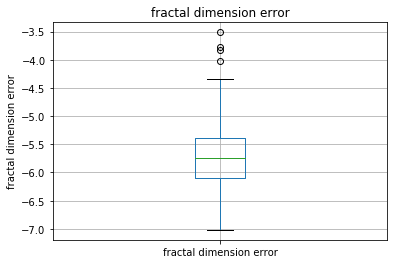

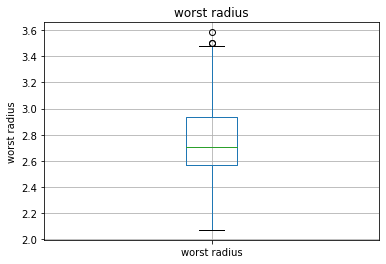

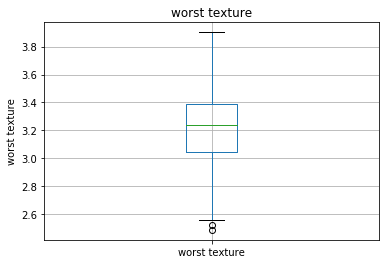

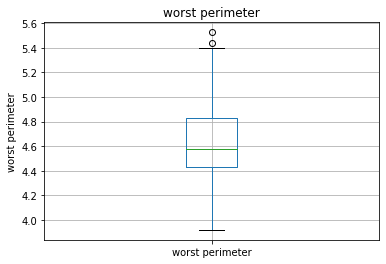

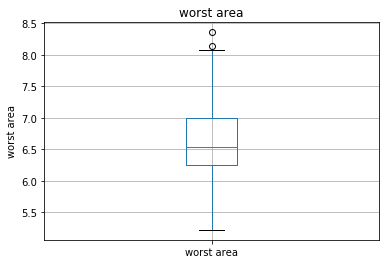

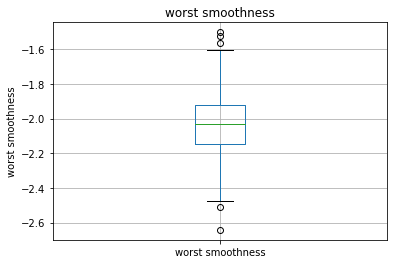

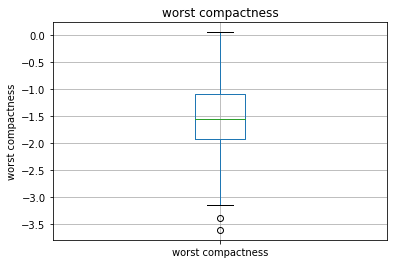

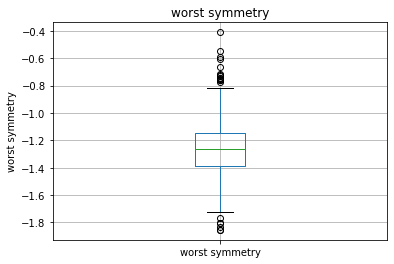

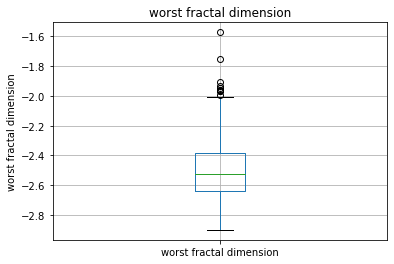

In [71]:
def find_outliers(df, var):
    df = df.copy()

    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()

for var in df.columns:
    find_outliers(df,var)

# Feature Engineering

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [73]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [74]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 1]
vars_with_na

[]

In [75]:
for var in vars_with_na:
    print(var, 'percentage of missing value:', np.round(df[var].isnull().mean(),3))

In [76]:
numerical_var = [var for var in df.columns if df[var].dtypes != 'O']
numerical_var

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [77]:
discrete_var = [var for var in numerical_var if len(df[var].unique()) < 20]
discrete_var

['target']

In [78]:
continous_var = [var for var in df.columns.drop('target') if var is not discrete_var]
continous_var

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [80]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



# Feature Selection

## Constant and Quasi-constant Features

In [81]:
constant_feature = [feature for feature in X_train.columns if X_train[feature].nunique() == 1]
#constant_feature = [feature for feature in X_train.columns if X_train[feature].std() == 0]

In [82]:
len(constant_feature)

0

In [83]:
len(fs.featutreSelection.quasi_constant(X_train,0.95))

0

## 2.2: Duplication

In [84]:

fs.featutreSelection.duplicateColumns(X_train)
                

0
5
10
15
20
25
--------


[]

## 2.3: Correlation 

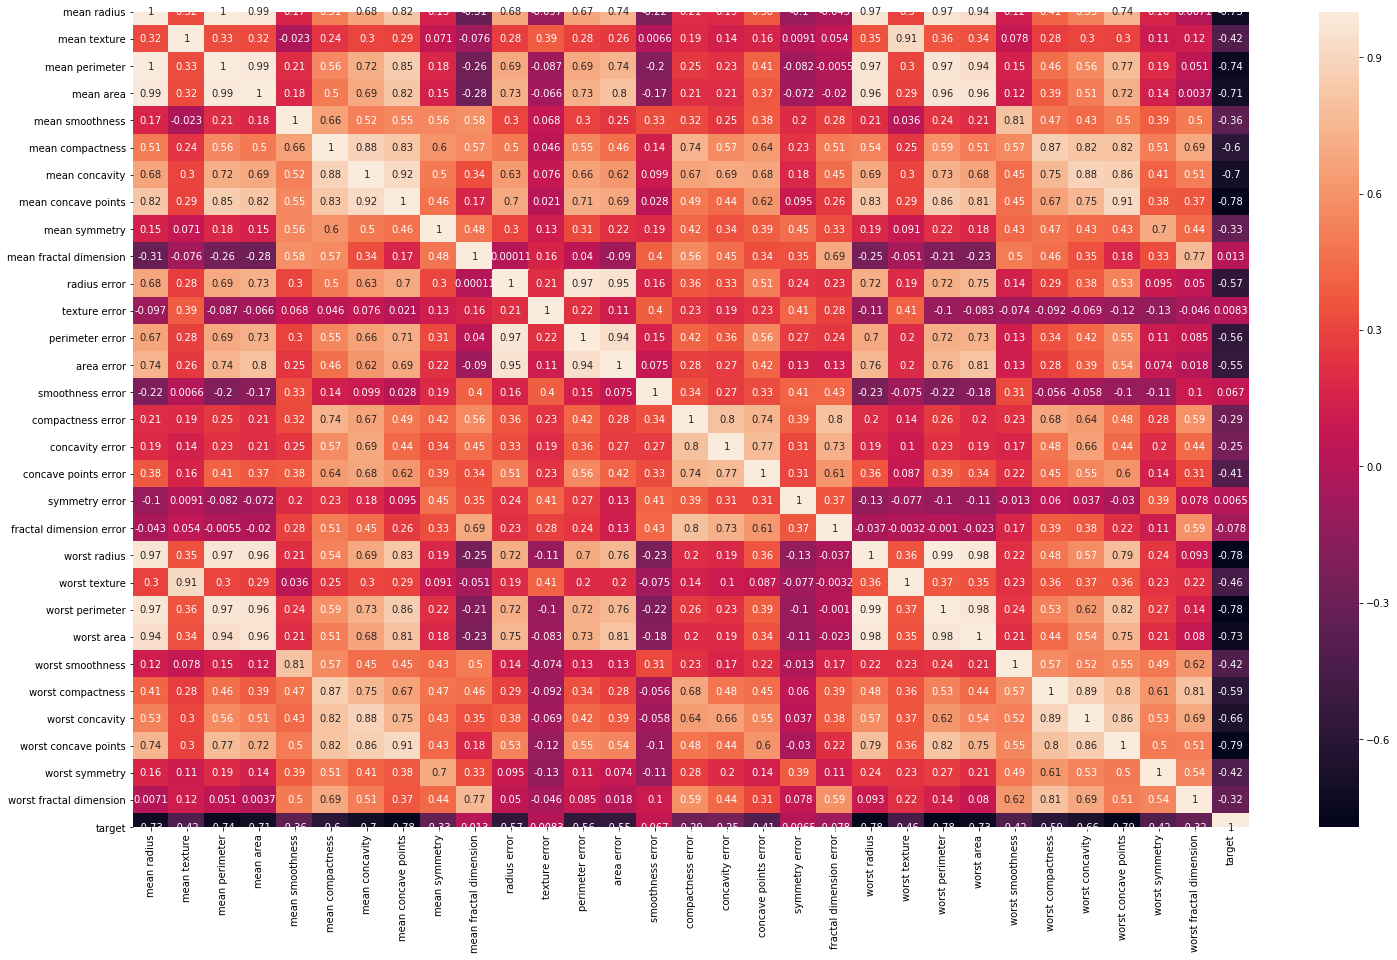

In [85]:
plt.figure(figsize =(25,15))
sns.heatmap(df.corr(), annot=True)

In [88]:
corr_features = fs.featutreSelection.correlation(X_train, 0.8)
print('------------')
print(len(set(corr_features)))
print('-------------')
corr_features

0.9978027707289656 mean perimeter mean radius
0.9866041065895148 mean area mean radius
0.985867373417476 mean area mean perimeter
0.8851178006010791 mean concavity mean compactness
0.8027899580197115 mean concave points mean radius
0.8336097598322846 mean concave points mean perimeter
0.8008341120348177 mean concave points mean area
0.8399761273275181 mean concave points mean compactness
0.9274992639687084 mean concave points mean concavity
0.9724036445154732 perimeter error radius error
0.9495209279972687 area error radius error
0.9367114689997306 area error perimeter error
0.8089819390863203 concavity error compactness error
0.800498673539317 fractal dimension error compactness error
0.9663532338278656 worst radius mean radius
0.966317485569891 worst radius mean perimeter
0.9588888250925813 worst radius mean area
0.8112774630000927 worst radius mean concave points
0.9115043444576446 worst texture mean texture
0.962872190599127 worst perimeter mean radius
0.9682269307752592 worst peri

{'compactness error',
 'mean area',
 'mean compactness',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'mean radius',
 'mean smoothness',
 'mean texture',
 'perimeter error',
 'radius error',
 'worst compactness',
 'worst concavity',
 'worst perimeter',
 'worst radius'}

In [89]:
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [90]:
X_train_corr.drop(labels=corr_features, axis=1, inplace=True)
X_test_corr.drop(labels=corr_features, axis=1, inplace=True)

In [91]:
X_train_corr.shape, X_test_corr.shape

((455, 15), (114, 15))

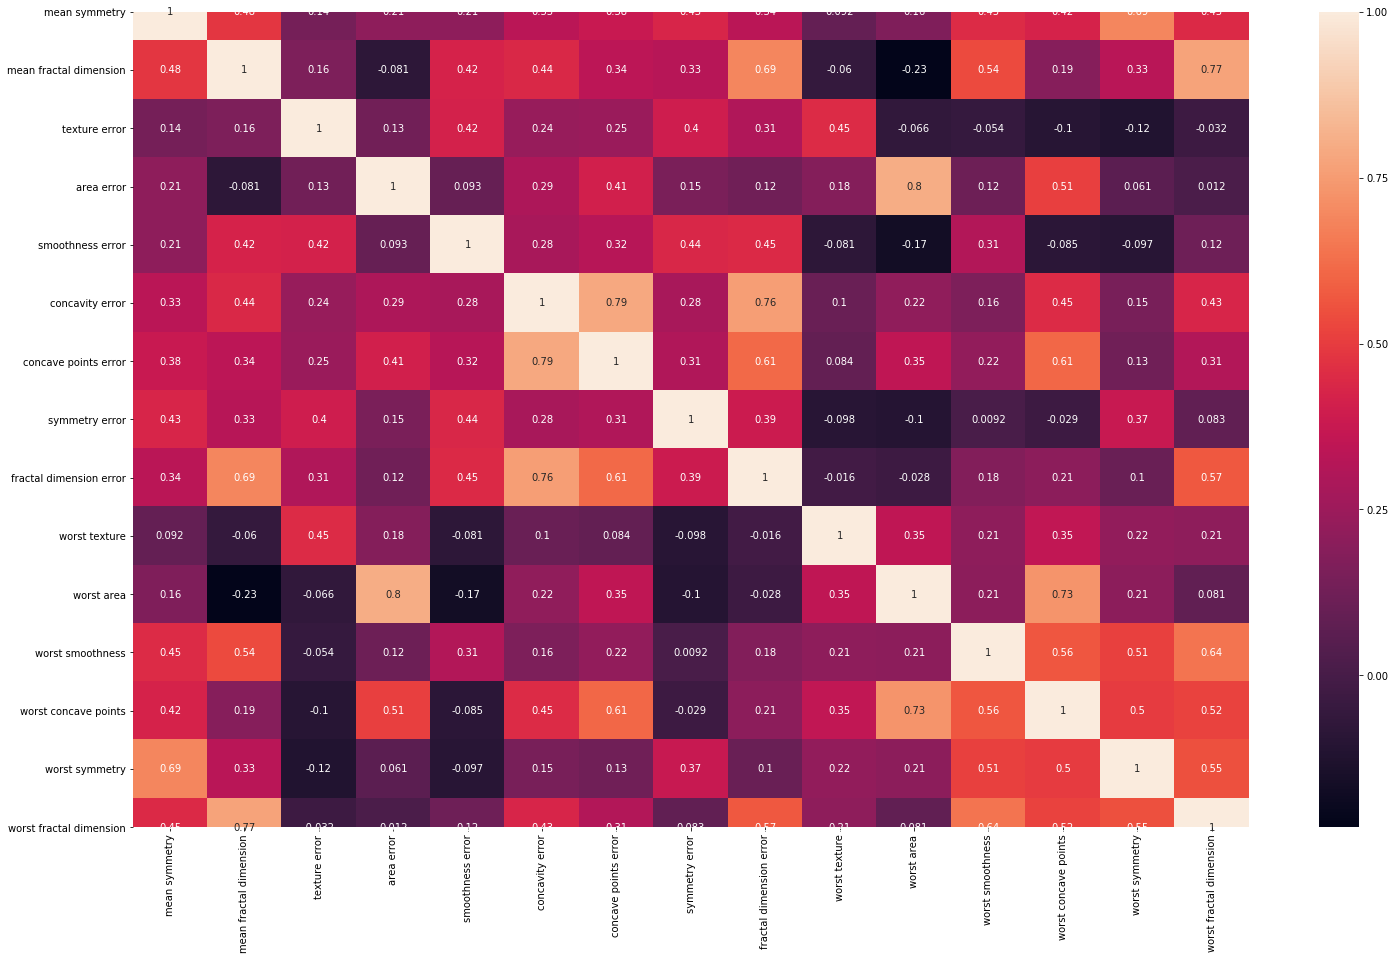

In [92]:
# Corrolation between features
plt.figure(figsize =(25,15))
sns.heatmap(X_train_corr.corr(), annot=True)

In [93]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

feature1         feature2      corr
0   mean perimeter      mean radius  0.997803
1      mean radius   mean perimeter  0.997803
2  worst perimeter     worst radius  0.993599
3     worst radius  worst perimeter  0.993599
4      mean radius        mean area  0.986604

In [94]:
corrmat.shape

(82, 3)

In [95]:
set(corrmat.feature1)

{'area error',
 'compactness error',
 'concavity error',
 'fractal dimension error',
 'mean area',
 'mean compactness',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'mean radius',
 'mean smoothness',
 'mean texture',
 'perimeter error',
 'radius error',
 'worst area',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst fractal dimension',
 'worst perimeter',
 'worst radius',
 'worst smoothness',
 'worst texture'}

In [96]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 8 correlated groups
out of 30 total features


In [97]:
for i, group in enumerate(correlated_groups):
    print('Group',i+1, '---------------------------------------------------')
    print(group)
    print()
   


Group 1 ---------------------------------------------------
          feature1             feature2      corr
0   mean perimeter          mean radius  0.997803
6   mean perimeter            mean area  0.985867
14  mean perimeter      worst perimeter  0.968227
19  mean perimeter         worst radius  0.966317
33  mean perimeter           worst area  0.935983
59  mean perimeter  mean concave points  0.833610

Group 2 ---------------------------------------------------
           feature1      feature2      corr
12  perimeter error  radius error  0.972404
30  perimeter error    area error  0.936711

Group 3 ---------------------------------------------------
          feature1              feature2      corr
37  mean concavity   mean concave points  0.927499
45  mean concavity      mean compactness  0.885118
47  mean concavity       worst concavity  0.884955
52  mean concavity  worst concave points  0.852274

Group 4 ---------------------------------------------------
        feature1    

In [98]:
from sklearn.ensemble import RandomForestClassifier
selected_features = []
for i, group in enumerate(correlated_groups):
    features = list(group['feature2'].unique()) + list(group['feature1'].unique())
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train[features].fillna(0), y_train)

    importance = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)], axis=1)
    print('Group' , i+1)
    importance.columns = ['feature', 'importance']
    importance_df=importance.sort_values(by='importance', ascending=False).reset_index(drop=True)
    print(importance_df)

    selected_features.append(importance_df.at[0,'feature'])
    print('------------------------------')


Group 1
               feature  importance
0      worst perimeter    0.260914
1  mean concave points    0.208227
2         worst radius    0.198561
3           worst area    0.170197
4            mean area    0.062883
5       mean perimeter    0.058159
6          mean radius    0.041059
------------------------------
Group 2
           feature  importance
0       area error    0.473171
1     radius error    0.280797
2  perimeter error    0.246032
------------------------------
Group 3
                feature  importance
0  worst concave points    0.337528
1   mean concave points    0.333778
2        mean concavity    0.208264
3       worst concavity    0.083940
4      mean compactness    0.036490
------------------------------
Group 4
         feature  importance
0  worst texture    0.501673
1   mean texture    0.498327
------------------------------
Group 5
                   feature  importance
0     worst concave points    0.481219
1          worst concavity    0.265148
2        wor

In [99]:
selected_features=set(selected_features)

In [100]:
correlated_features=set(corrmat.feature1)


In [101]:
difference_feature =correlated_features.difference(selected_features)

In [102]:
difference_feature

{'fractal dimension error',
 'mean area',
 'mean compactness',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'mean radius',
 'mean smoothness',
 'mean texture',
 'perimeter error',
 'radius error',
 'worst area',
 'worst compactness',
 'worst concavity',
 'worst fractal dimension',
 'worst radius'}

In [103]:
corr_features


{'compactness error',
 'mean area',
 'mean compactness',
 'mean concave points',
 'mean concavity',
 'mean perimeter',
 'mean radius',
 'mean smoothness',
 'mean texture',
 'perimeter error',
 'radius error',
 'worst compactness',
 'worst concavity',
 'worst perimeter',
 'worst radius'}

In [104]:
X_train_corr2 = X_train.copy()
X_test_corr2 = X_test.copy()

In [105]:
X_train_corr2.drop(labels=difference_feature, axis=1, inplace=True)
X_test_corr2.drop(labels=difference_feature, axis=1, inplace=True)

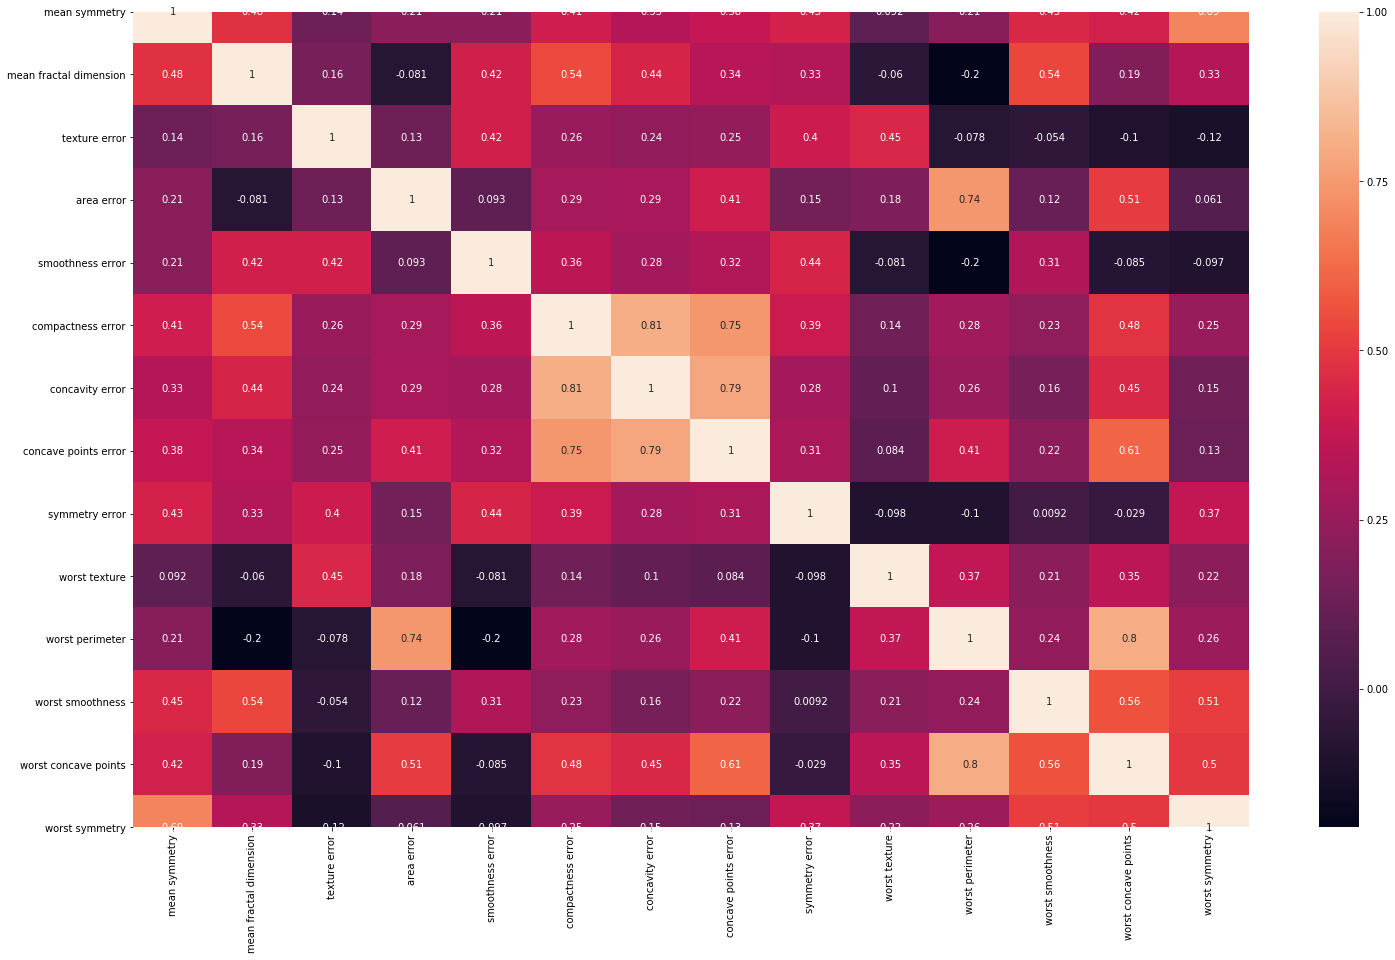

In [106]:
# Corrolation between features
plt.figure(figsize =(25,15))
sns.heatmap(X_train_corr2.corr(), annot=True)               


## Step 3: Machine Learning Algorithm

In [107]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import time

In [108]:
def run_randomForests(X_train, X_test, y_train, y_test):
    a = time.time()
    rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)
    b = time.time()
    print('Time: ', b-a)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [109]:
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Time:  0.21087312698364258
Train set
Random Forests roc-auc: 0.9979624085163008
Test set
Random Forests roc-auc: 0.9803542673107891


In [110]:
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)

Time:  0.12795495986938477
Train set
Random Forests roc-auc: 0.9981495342648038
Test set
Random Forests roc-auc: 0.9874396135265701


In [111]:
run_randomForests(X_train_corr2,
                  X_test_corr2,
                  y_train, y_test)

Time:  0.09792685508728027
Train set
Random Forests roc-auc: 0.9973802395209581
Test set
Random Forests roc-auc: 0.9903381642512077


In [112]:
def run_logistic(X_train, X_test, y_train, y_test):
    a = time.time()
    logit = LogisticRegression(random_state=44, max_iter=500)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    b = time.time()
    y_predict = logit.predict(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Time: ', b-a)
    print('Test set')
    pred = logit.predict_proba(X_test)
    y_predict = logit.predict(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    #cm = confusion_matrix(y_test, y_predict)
    #sns.heatmap(cm, annot=True)

In [113]:
run_logistic(X_train,
                  X_test,
                  y_train, y_test)
                

Train set
Logistic Regression roc-auc: 0.9939496007984031
Time:  0.02573990821838379
Test set
Logistic Regression roc-auc: 0.996135265700483


In [114]:
run_logistic(X_train_corr,
                  X_test_corr,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9839279773785762
Time:  0.007512092590332031
Test set
Logistic Regression roc-auc: 0.9800322061191626


In [115]:
run_logistic(X_train_corr2,
                  X_test_corr2,
                  y_train, y_test)


Train set
Logistic Regression roc-auc: 0.9820983033932136
Time:  0.007478952407836914
Test set
Logistic Regression roc-auc: 0.9748792270531401


## Statistical methods
### Mutual Information
# I(x;y)=$\sum_{x \in X }\sum_{y \in Y } P_{(x,y)}(x,y)log_2\large(\frac{p_{(x,y)}(x,y)}{p_x(x)p_y(y)})$


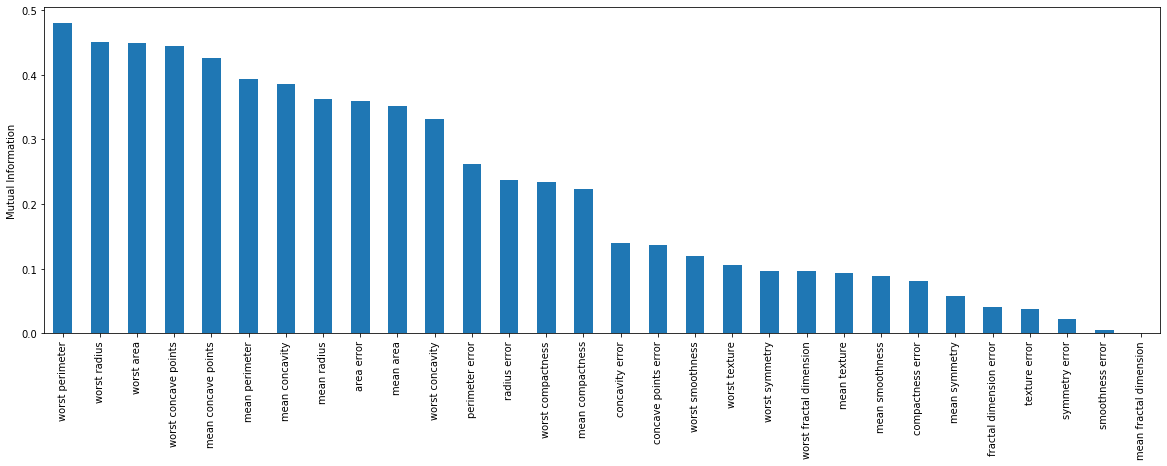

In [117]:
fs.featutreSelection.mutualInformation(X_train,y_train)

In [121]:
#mutualInformation(X_train_corr,y_train)

In [122]:
#mutualInformation(X_train_corr2,y_train)

In [123]:
from sklearn.feature_selection import SelectKBest
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

NameError: name 'mutual_info_classif' is not defined

In [326]:
X_train_mutual = sel_.transform(X_train)
X_test_mutual = sel_.transform(X_test)

In [327]:
run_randomForests(X_train_mutual,
                  X_test_mutual,
                  y_train, y_test)

Time:  0.20338201522827148
Train set
Random Forests roc-auc: 0.9944506218598138
Test set
Random Forests roc-auc: 0.9896424991647176


In [328]:
run_logistic(X_train_mutual,
                  X_test_mutual,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.987583395107487
Time:  0.005735158920288086
Test set
Logistic Regression roc-auc: 0.9913130638155697


### Chi-square

In [329]:
from sklearn.feature_selection import chi2
f_score = chi2(X_train, y_train)
f_score

(array([2.25026535e+02, 7.97967995e+01, 1.70006193e+03, 4.59076011e+04,
        1.11477008e-01, 4.43583777e+00, 1.59881299e+01, 8.53358027e+00,
        2.02936017e-01, 4.09844437e-04, 3.10185454e+01, 1.21693419e-02,
        2.25324440e+02, 7.72593743e+03, 3.47652448e-03, 5.11319815e-01,
        9.47666517e-01, 2.63750877e-01, 1.60236571e-04, 4.00776056e-03,
        4.14121386e+02, 1.43774362e+02, 3.09219113e+03, 9.51865921e+04,
        2.87905322e-01, 1.56815816e+01, 3.12374157e+01, 1.09251118e+01,
        1.10319044e+00, 1.68842958e-01]),
 array([7.24474146e-51, 4.14964353e-19, 0.00000000e+00, 0.00000000e+00,
        7.38468808e-01, 3.51919444e-02, 6.37408847e-05, 3.48653182e-03,
        6.52361342e-01, 9.83848238e-01, 2.55574713e-08, 9.12159767e-01,
        6.23805215e-51, 0.00000000e+00, 9.52982328e-01, 4.74568076e-01,
        3.30313977e-01, 6.07554884e-01, 9.89900281e-01, 9.49522140e-01,
        4.64533914e-92, 3.98037097e-33, 0.00000000e+00, 0.00000000e+00,
        5.91565986e-01

In [330]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True)

worst perimeter            0.000000e+00
mean perimeter             0.000000e+00
mean area                  0.000000e+00
worst area                 0.000000e+00
area error                 0.000000e+00
worst radius               4.645339e-92
perimeter error            6.238052e-51
mean radius                7.244741e-51
worst texture              3.980371e-33
mean texture               4.149644e-19
worst concavity            2.283228e-08
radius error               2.555747e-08
mean concavity             6.374088e-05
worst compactness          7.495049e-05
worst concave points       9.486948e-04
mean concave points        3.486532e-03
mean compactness           3.519194e-02
worst symmetry             2.935670e-01
concavity error            3.303140e-01
compactness error          4.745681e-01
worst smoothness           5.915660e-01
concave points error       6.075549e-01
mean symmetry              6.523613e-01
worst fractal dimension    6.811422e-01
mean smoothness            7.384688e-01


In [331]:
sel_ = SelectKBest(chi2, k=10).fit(X_train, y_train)
X_train.columns[sel_.get_support()]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area'],
      dtype='object')

In [332]:
X_train_chi = sel_.transform(X_train)
X_test_chi = sel_.transform(X_test)

In [333]:
run_randomForests(X_train_chi,
                  X_test_chi,
                  y_train, y_test)

Time:  0.2450089454650879
Train set
Random Forests roc-auc: 0.9920517255580265
Test set
Random Forests roc-auc: 0.9812896759104577


In [334]:
run_logistic(X_train_chi,
                  X_test_chi,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.993246025862779
Time:  0.016952037811279297
Test set
Logistic Regression roc-auc: 0.9876378215836953


In [51]:
def roc_auc_plot(X_train,X_test,y_train,y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)
    y_pred_prob1 = rf.predict_proba(X_test)[:,1]
    fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
    auc1 = metrics.roc_auc_score(y_test, y_pred_prob1)


    logit = LogisticRegression(random_state=44, max_iter=500)
    logit.fit(X_train, y_train)
    y_pred_prob2 = logit.predict_proba(X_test)[:,1]
    fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
    auc2 = metrics.roc_auc_score(y_test, y_pred_prob2)


    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr1, tpr1, label= "Random Forest, auc="+str(round(auc1,3)))
    plt.plot(fpr2, tpr2, label= "Logistic Regression, auc="+ str(round(auc2,3)))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title('Receiver Operating Characteristic')
    plt.show()

In [57]:
roc_auc_plot(X_train,X_test,y_train,y_test)

NameError: name 'roc_auc_plot' is not defined

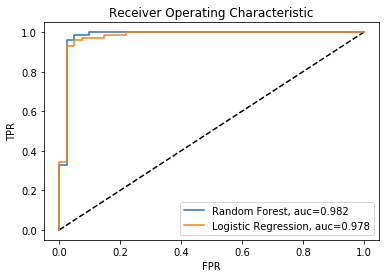

In [337]:
roc_auc_plot(X_train_corr,X_test_corr,y_train,y_test)

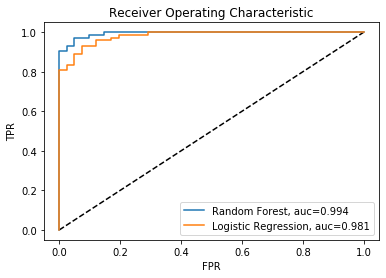

In [338]:
roc_auc_plot(X_train_corr2,X_test_corr2,y_train,y_test)

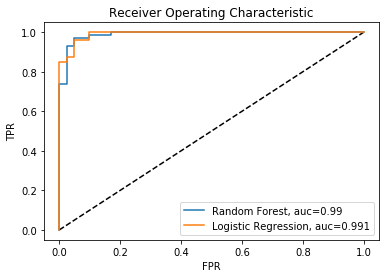

In [339]:
roc_auc_plot(X_train_mutual,X_test_mutual,y_train,y_test)

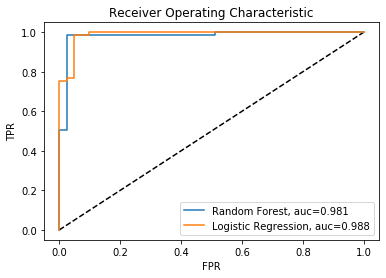

In [340]:
roc_auc_plot(X_train_chi,X_test_chi,y_train,y_test)

## Wrapper methods

### Step-forward-feature

In [341]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [342]:
sfs = SFS(RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0), 
           k_features=10, # the more features we want, the longer it will take to run
           forward=True, 
           floating=False, # see the docs for more details in this parameter
           verbose=2, # this indicates how much to print out intermediate steps
           scoring='roc_auc',
           cv=2)

sfs = sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.9s finished

[2020-10-30 14:10:26] Features: 1/10 -- score: 0.9328418527581357[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    8.0s finished

[2020-10-30 14:10:35] Features: 2/10 -- score: 0.9774327565942853[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    7.8s finished

[2020-10-30 14:10:42] Features: 3/10 -- score: 0.9782439163021908[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [343]:
X_train.columns[list(sfs.k_feature_idx_)]

Index(['mean texture', 'mean smoothness', 'mean concavity', 'perimeter error',
       'concave points error', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity'],
      dtype='object')

In [344]:
selected_feat_forward = X_train.columns[list(sfs.k_feature_idx_)]

In [345]:
run_randomForests(X_train[selected_feat_forward],
                  X_test[selected_feat_forward],
                  y_train, y_test)

Time:  0.11140918731689453
Train set
Random Forests roc-auc: 0.9963965077011778
Test set
Random Forests roc-auc: 0.9859672569328434


### Step-backward-feature

In [352]:
sfs = SFS(RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0),
          k_features=15, # the lower the features we want, the longer this will take
          forward=False,
          floating=False,
          verbose=2,
          scoring='roc_auc',
          cv=2)
sfs = sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.0s finished

[2020-10-30 14:15:06] Features: 29/15 -- score: 0.991381909789792[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    7.7s finished

[2020-10-30 14:15:13] Features: 28/15 -- score: 0.9879443556000848[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    7.5s finished

[2020-10-30 14:15:21] Features: 27/15 -- score: 0.9923522668156682[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [353]:
X_train.columns[list(sfs.k_feature_idx_)]


Index(['mean texture', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'perimeter error',
       'area error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst texture', 'worst perimeter', 'worst smoothness'],
      dtype='object')

In [354]:
selected_feat_backward = X_train.columns[list(sfs.k_feature_idx_)]

In [355]:
run_randomForests(X_train[selected_feat_forward],
                  X_test[selected_feat_forward],
                  y_train, y_test)

Time:  0.11861085891723633
Train set
Random Forests roc-auc: 0.9963965077011778
Test set
Random Forests roc-auc: 0.9859672569328434
